In [1]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import re
nltk.download('wordnet')
import pickle
import joblib




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\johnk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import pandas as pd


recipes_df = pd.read_csv(r"C:\Users\johnk\Flavolingo\Dataset\RecipeNLG_dataset.csv")

recipes_df.head()


,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [4]:
# Drop the 'Unnamed: 0' column
recipes_df = recipes_df.drop(columns=['Unnamed: 0'])

recipes_df.head()


,title,ingredients,directions,link,source,NER
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [5]:
# cuisins 
country_keywords = {
    'Italian': 'Italian',
    'Mexican': 'Mexican',
    'French': 'French',
    'chinese': 'chinese',
    'Mediterranean': 'Mediterranean',
    'Indian': 'Indian',
    'Greek' : 'Greek'
}

# Function to detect country
def detect_country(title):
    if not isinstance(title, str):
        return 'Unknown'
    for keyword, country in country_keywords.items():
        if re.search(r'\b' + re.escape(keyword) + r'\b', title, re.IGNORECASE):
            return country
    return 'Unknown'

# Apply function
recipes_df['Cuisin'] = recipes_df['title'].apply(detect_country)

recipes_df.head()


,title,ingredients,directions,link,source,NER,Cuisin
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu...",Unknown
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom...",Unknown
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar...",Unknown
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo...",Unknown
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu...",Unknown


In [6]:
recipes_df["source"].value_counts()

source
Gathered     1643098
Recipes1M     588044
Name: count, dtype: int64

In [7]:
recipes_df["Cuisin"].value_counts()

Cuisin
Unknown          2165920
Mexican            17092
Italian            16049
French             13247
Greek               6469
chinese             5844
Indian              3327
Mediterranean       3194
Name: count, dtype: int64

C:\Users\johnk\AppData\Local\Temp\ipykernel_1016\233167631.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cuisine', y='Count', data=cuisine_df, palette='viridis')


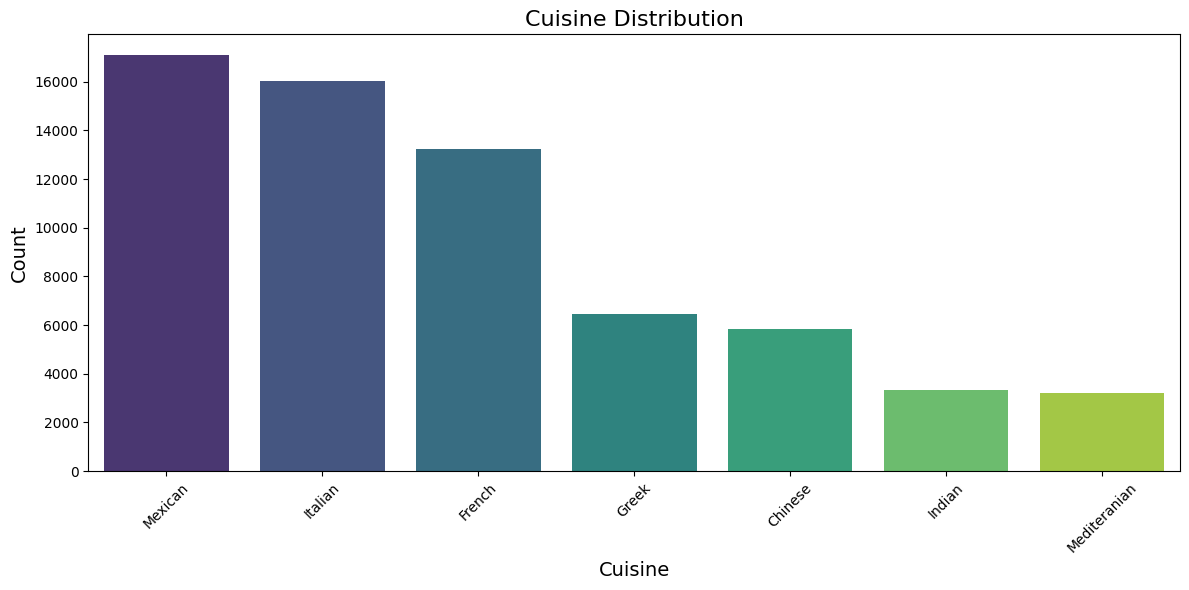

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your cuisine counts (replace with your actual data if needed)
cuisine_counts = {
    'Mexican': 17092,
    'Italian': 16049,
    'French': 13247,
    'Greek': 6469,
    'Chinese': 5844,
    'Indian': 3327,
    'Mediteranian': 3194
}

# Create a DataFrame for easier plotting
import pandas as pd
cuisine_df = pd.DataFrame(list(cuisine_counts.items()), columns=['Cuisine', 'Count'])

# Sort cuisines by count (optional but looks nicer)
cuisine_df = cuisine_df.sort_values('Count', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisine', y='Count', data=cuisine_df, palette='viridis')

plt.title('Cuisine Distribution', fontsize=16)
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
def ingredient_preprocess(ingredients):
    # Remove punctuation and digits
    ingredients = re.sub(r'[^a-zA-Z\s]', '', ingredients)
    ingredients = ingredients.lower()
    word_tokens = ingredients.split()
    clean_ingredients = ' '.join([
        lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words
    ])
    return clean_ingredients

recipes_df["clean_ingredients"]= recipes_df["ingredients"].apply(ingredient_preprocess)
recipes_df.head()

,title,ingredients,directions,link,source,NER,Cuisin,clean_ingredients
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu...",Unknown,c firmly packed brown sugar c evaporated milk ...
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom...",Unknown,small jar chipped beef cut boned chicken breas...
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar...",Unknown,oz pkg frozen corn oz pkg cream cheese cubed c...
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo...",Unknown,large whole chicken oz can chicken gravy oz cr...
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu...",Unknown,c peanut butter c graham cracker crumb c melte...


In [10]:
def cuisin_preprocess(cuisin):
    # Remove punctuation and digits
    cuisin = re.sub(r'[^a-zA-Z\s]', '', cuisin)
    cuisin = cuisin.lower()
    word_tokens = cuisin.split()
    clean_cuisin = ' '.join([
        lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words
    ])
    return clean_cuisin
recipes_df["clean_cuisin"]= recipes_df["Cuisin"].apply(cuisin_preprocess)

In [11]:
recipes_df.head()

,title,ingredients,directions,link,source,NER,Cuisin,clean_ingredients,clean_cuisin
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu...",Unknown,c firmly packed brown sugar c evaporated milk ...,unknown
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom...",Unknown,small jar chipped beef cut boned chicken breas...,unknown
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar...",Unknown,oz pkg frozen corn oz pkg cream cheese cubed c...,unknown
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo...",Unknown,large whole chicken oz can chicken gravy oz cr...,unknown
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu...",Unknown,c peanut butter c graham cracker crumb c melte...,unknown


In [12]:
# Keep only rows where the cuisine is NOT 'Unknown'
known_recipes_df = recipes_df[recipes_df['Cuisin'] != 'Unknown'].copy()


In [13]:
known_recipes_df.head()

,title,ingredients,directions,link,source,NER,Cuisin,clean_ingredients,clean_cuisin
48,Mexican Cookie Rings,"[""1 1/2 c. sifted flour"", ""1/2 tsp. baking pow...","[""Sift flour, baking powder and salt together....",www.cookbooks.com/Recipe-Details.aspx?id=364136,Gathered,"[""flour"", ""baking powder"", ""salt"", ""butter"", ""...",Mexican,c sifted flour tsp baking powder tsp salt c bu...,mexican
133,French Onion Soup,"[""1/4 lb. butter"", ""2 1/2 lb. onions, sliced"",...","[""Heat butter in heavy kettle."", ""Add sliced o...",www.cookbooks.com/Recipe-Details.aspx?id=243544,Gathered,"[""butter"", ""onions"", ""beef stock"", ""chicken st...",French,lb butter lb onion sliced qt beef stock can ca...,french
151,Baked French Toast,"[""5 large eggs, slightly beaten"", ""1/4 c. suga...","[""Mix all well in medium bowl and cut one 16 o...",www.cookbooks.com/Recipe-Details.aspx?id=93889,Gathered,"[""eggs"", ""sugar"", ""ground nutmeg"", ""orange jui...",French,large egg slightly beaten c sugar tsp ground n...,french
181,Chinese Hamburger,"[""1 lb. hamburger"", ""2 Tbsp. oil"", ""1 onion, c...","[""Brown hamburger. Add onion and celery until ...",www.cookbooks.com/Recipe-Details.aspx?id=130210,Gathered,"[""hamburger"", ""oil"", ""onion"", ""celery"", ""rice""...",chinese,lb hamburger tbsp oil onion chopped celery rib...,chinese
221,Mexican Casserole,"[""Fritos or Doritos"", ""1 lb. ground beef"", ""1 ...","[""In 9 X 13 dish spree fritos or doritos to co...",www.cookbooks.com/Recipe-Details.aspx?id=24187,Gathered,"[""Fritos"", ""ground beef"", ""onion"", ""mushroom s...",Mexican,fritos doritos lb ground beef onion rotel mush...,mexican


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Keep it sparse, no .toarray()
ingredient_vectorizer = TfidfVectorizer(max_features=5000)  # Limit dimensions
tfidf_matrix =ingredient_vectorizer.fit_transform(known_recipes_df['clean_ingredients'])

cuisin_vectorizer = TfidfVectorizer()
cuisin_tfidf_matrix = cuisin_vectorizer.fit_transform(known_recipes_df["clean_cuisin"])



# Use cosine similarity with sparse data
##nn = NearestNeighbors(metric='cosine', algorithm='brute')
##nn.fit(tfidf_matrix)


In [15]:
# Combine both vectors into a single feature matrix

combined_matrix = hstack([tfidf_matrix, cuisin_tfidf_matrix])

In [16]:
from sklearn.neighbors import NearestNeighbors

# Use cosine similarity for text
knn_model = NearestNeighbors(n_neighbors=5,metric='cosine', algorithm='brute')
knn_model.fit(combined_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [19]:
known_recipes_df.to_csv(r'C:\Users\johnk\Flavolingo\streamlit_app\known_recipes.csv', index=False)




In [20]:
model = knn_model

with open('nearest_neighbors.pkl', 'wb') as file:
    pickle.dump(model, file)


In [29]:

# Save the sparse tfidf_matrix
joblib.dump(combined_matrix, r'C:\Users\johnk\Flavolingo\streamlit_app\combined_tfidf_matrix_sparse.pkl')


['C:\\Users\\johnk\\Flavolingo\\streamlit_app\\combined_tfidf_matrix_sparse.pkl']

In [28]:
# Save the vectorizer
joblib.dump(ingredient_vectorizer, r'C:\Users\johnk\Flavolingo\streamlit_app\ingredient_vectorizer.pkl')


['C:\\Users\\johnk\\Flavolingo\\streamlit_app\\ingredient_vectorizer.pkl']

In [26]:
joblib.dump(cuisin_vectorizer, r'C:\Users\johnk\Flavolingo\streamlit_app\cuisin_vectorizer.pkl')


['C:\\Users\\johnk\\Flavolingo\\streamlit_app\\cuisin_vectorizer.pkl']

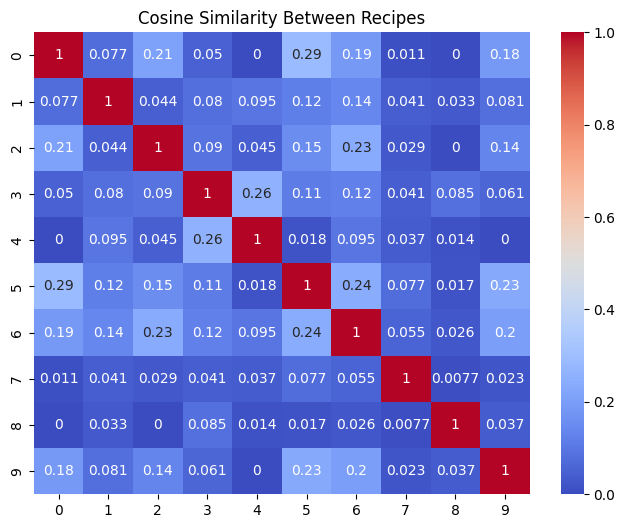

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


similarity = cosine_similarity(tfidf_matrix[:10])  

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity, annot=True, cmap='coolwarm')
plt.title('Cosine Similarity Between Recipes')
plt.show()
